In [41]:
import keras

In [42]:
from keras.models import load_model

In [43]:
model = load_model('savedModel.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 40)        1120      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 30)        30030     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14520)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               7260500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [44]:
img_path = 'down.JPG'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path,target_size = (100,100))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis = 0)
img_tensor /= 255;

print(img_tensor.shape)

(1, 100, 100, 3)


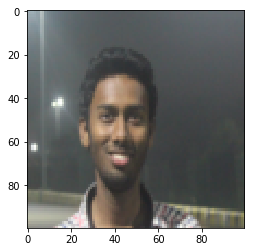

In [46]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [47]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:5]]

activation_model = models.Model(inputs = model.input,outputs = layer_outputs)

In [48]:
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(len(activations))
print(first_layer_activation.shape)

5
(1, 98, 98, 40)


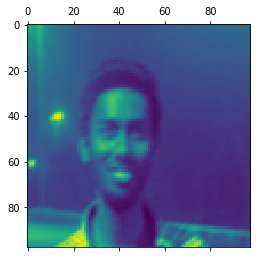

In [49]:
plt.matshow(first_layer_activation[0,:,:,2],cmap = 'viridis')
plt.show()

98 4 40
49 4 40
45 3 30
22 3 30


/home/vedavikas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


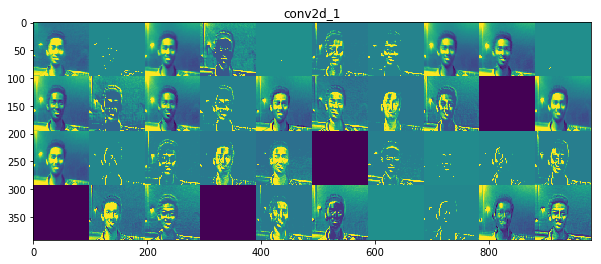

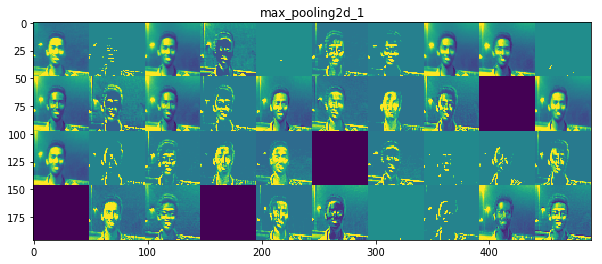

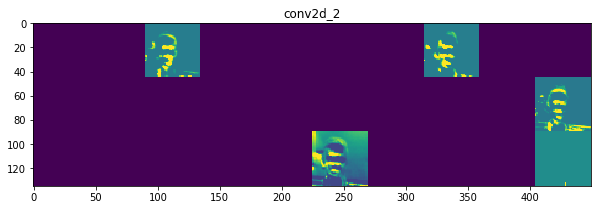

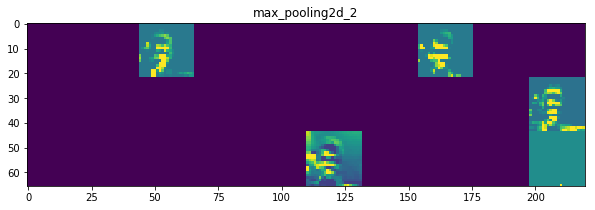

In [50]:
layer_names = []

for layer in model.layers[:4]:
    layer_names.append(layer.name)

images_per_row = 10

for layer_name,layer_activation in zip(layer_names,activations):
    
    no_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_cols = no_features//images_per_row
    print(size,n_cols,no_features)
    
    display_grid = np.zeros((size * n_cols,size * images_per_row))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image
     
    scale = 1./size
    plt.figure(figsize = (scale*display_grid.shape[1],scale*display_grid.shape[0]))
    
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect = 'auto',cmap = 'viridis')
    
    
plt.show()            